In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import pandas as pd
from scipy import stats

In [3]:
genuine = pd.read_pickle('words.pkl')  
forgery = pd.read_pickle('sigantures_forg.pkl')  

In [44]:
genuine

,x,y,p,v,acceleration,angle,radius
0,"[-1.6711171585504914, -1.6711171585504914, -1....","[-1.3673294209233846, -1.4506813693303338, -1....","[-2.373014624680726, -2.3788569355019025, -2.0...","[-1.8037035860300257, -1.3752632763600428, -1....","[-0.04150026046544849, -0.016633728014003066, ...","[-2.971966501931285, 0.5553312221044487, -1.63...","[-0.19369985814862367, -0.1620043047100487, 0...."
1,"[-2.1237038158842774, -2.1237038158842774, -2....","[-1.1370332867243613, -1.1609174216437492, -1....","[-1.4307113882535938, -1.3414067949339117, -1....","[-1.7729537282861147, -1.5201173602411684, -0....","[-0.1096733310499609, 0.48190075742199606, 0.4...","[-0.6427606180721162, -2.658061282070753, -2.5...","[-0.17785051022568468, -0.16301932056140578, -..."
2,"[-1.8713272261061347, -1.8722073196087807, -1....","[-1.4902079419173713, -1.7006016580834116, -1....","[-3.576837346262028, -3.7088434390488842, -2.8...","[-2.004890820966902, -1.2171293079573788, -0.6...","[-0.09971056005253602, 0.010762380843825388, 0...","[1.3348051302553867, 1.3303940888574113, -0.83...","[-0.19159687008535528, -0.18528712509213022, -..."
3,"[-1.9364637288073965, -1.9364637288073965, -1....","[-1.2210447566081255, -1.3280454711487126, -1....","[-2.1777670423179893, -1.934240775112581, -1.7...","[-1.5101349113083131, -0.9739642595189455, -1....","[-0.061345479906335786, 0.41547991274020635, -...","[-2.86948283005519, -2.86948283005519, -2.8694...","[-0.20139404130384717, -0.20139404130384717, -..."
4,"[-2.072928814410654, -2.0628506472756594, -2.0...","[-1.0765844056798408, -1.0765844056798408, -1....","[-2.009859329432864, -1.7409712310098733, -1.3...","[-1.8487895743821074, -1.4982372304943459, -1....","[-0.08061220692715064, -0.17973426897041075, -...","[-0.796668592813795, -0.796668592813795, -0.79...","[-0.18338291122454264, -0.18338291122454264, -..."
...,...,...,...,...,...,...,...
43332,"[-1.6549393605289344, -1.6589065233137303, -1....","[-1.7542381202325756, -1.6907017246517546, -1....","[-1.645591296544348, -1.5524393178439782, -1.4...","[-1.605277636754059, -0.974129102074562, -0.68...","[-0.09803944147388564, 1.0351865463917227, 0.8...","[-1.8151358199660863, -1.8553842557892923, -1....","[-0.36307869954894967, -0.3512165863447782, -0..."
43333,"[-1.6276348572813948, -1.6346260678431406, -1....","[-1.2823148110918519, -1.266942757552816, -1.2...","[-1.264659967254014, -0.990317624772436, -0.62...","[-1.3685383606349133, -1.1342883754606954, -1....","[-0.09604952125328083, 0.09582177207648165, 0....","[-0.8457091951069952, -0.6395218984995071, -0....","[-0.4428413671010742, -0.0010100711490817623, ..."
43334,"[-1.6047261739974965, -1.6116847246377521, -1....","[-1.5840776263802885, -1.5069629678428416, -1....","[-1.4154388455052935, -1.2168343016064909, -1....","[-1.6252504836602606, -0.8099603863672024, -0....","[-0.19613134601014737, 1.2138733784018922, 0.7...","[-1.826344907803766, -1.7651036335871835, -1.5...","[-0.18434242482297697, -0.16923324243726307, -..."
43335,"[-1.6140612604085605, -1.6153076784314981, -1....","[-1.53880336556993, -1.4781447960966987, -1.43...","[-1.1770482433966856, -1.0766247845015344, -0....","[-1.3697855254133176, -0.9888872350895664, -0....","[-0.1551180909914339, 0.18038855522364963, 0.2...","[-1.8846059438280318, -1.4386933979878056, -0....","[-0.27945278342829954, -0.06206140453058414, -..."


In [4]:
index_col = genuine['index']
genuine = genuine.drop(columns=['index'])

In [5]:
def norm_v(x: list):
    x = np.array(x, dtype=float)
    v = np.interp(np.arange(0, len(x), len(x)/256), np.arange(0, len(x)), x)
    v = np.nan_to_num(stats.zscore(v))
    return v

for col in genuine.columns:
    genuine[col] = genuine[col].apply(norm_v)

In [6]:
genuine

,x,y,p,v,acceleration,angle,radius
0,"[-1.6711171585504914, -1.6711171585504914, -1....","[-1.3673294209233846, -1.4506813693303338, -1....","[-2.373014624680726, -2.3788569355019025, -2.0...","[-1.8037035860300257, -1.3752632763600428, -1....","[-0.04150026046544849, -0.016633728014003066, ...","[-2.971966501931285, 0.5553312221044487, -1.63...","[-0.19369985814862367, -0.1620043047100487, 0...."
1,"[-2.1237038158842774, -2.1237038158842774, -2....","[-1.1370332867243613, -1.1609174216437492, -1....","[-1.4307113882535938, -1.3414067949339117, -1....","[-1.7729537282861147, -1.5201173602411684, -0....","[-0.1096733310499609, 0.48190075742199606, 0.4...","[-0.6427606180721162, -2.658061282070753, -2.5...","[-0.17785051022568468, -0.16301932056140578, -..."
2,"[-1.8713272261061347, -1.8722073196087807, -1....","[-1.4902079419173713, -1.7006016580834116, -1....","[-3.576837346262028, -3.7088434390488842, -2.8...","[-2.004890820966902, -1.2171293079573788, -0.6...","[-0.09971056005253602, 0.010762380843825388, 0...","[1.3348051302553867, 1.3303940888574113, -0.83...","[-0.19159687008535528, -0.18528712509213022, -..."
3,"[-1.9364637288073965, -1.9364637288073965, -1....","[-1.2210447566081255, -1.3280454711487126, -1....","[-2.1777670423179893, -1.934240775112581, -1.7...","[-1.5101349113083131, -0.9739642595189455, -1....","[-0.061345479906335786, 0.41547991274020635, -...","[-2.86948283005519, -2.86948283005519, -2.8694...","[-0.20139404130384717, -0.20139404130384717, -..."
4,"[-2.072928814410654, -2.0628506472756594, -2.0...","[-1.0765844056798408, -1.0765844056798408, -1....","[-2.009859329432864, -1.7409712310098733, -1.3...","[-1.8487895743821074, -1.4982372304943459, -1....","[-0.08061220692715064, -0.17973426897041075, -...","[-0.796668592813795, -0.796668592813795, -0.79...","[-0.18338291122454264, -0.18338291122454264, -..."
...,...,...,...,...,...,...,...
43332,"[-1.6549393605289344, -1.6589065233137303, -1....","[-1.7542381202325756, -1.6907017246517546, -1....","[-1.645591296544348, -1.5524393178439782, -1.4...","[-1.605277636754059, -0.974129102074562, -0.68...","[-0.09803944147388564, 1.0351865463917227, 0.8...","[-1.8151358199660863, -1.8553842557892923, -1....","[-0.36307869954894967, -0.3512165863447782, -0..."
43333,"[-1.6276348572813948, -1.6346260678431406, -1....","[-1.2823148110918519, -1.266942757552816, -1.2...","[-1.264659967254014, -0.990317624772436, -0.62...","[-1.3685383606349133, -1.1342883754606954, -1....","[-0.09604952125328083, 0.09582177207648165, 0....","[-0.8457091951069952, -0.6395218984995071, -0....","[-0.4428413671010742, -0.0010100711490817623, ..."
43334,"[-1.6047261739974965, -1.6116847246377521, -1....","[-1.5840776263802885, -1.5069629678428416, -1....","[-1.4154388455052935, -1.2168343016064909, -1....","[-1.6252504836602606, -0.8099603863672024, -0....","[-0.19613134601014737, 1.2138733784018922, 0.7...","[-1.826344907803766, -1.7651036335871835, -1.5...","[-0.18434242482297697, -0.16923324243726307, -..."
43335,"[-1.6140612604085605, -1.6153076784314981, -1....","[-1.53880336556993, -1.4781447960966987, -1.43...","[-1.1770482433966856, -1.0766247845015344, -0....","[-1.3697855254133176, -0.9888872350895664, -0....","[-0.1551180909914339, 0.18038855522364963, 0.2...","[-1.8846059438280318, -1.4386933979878056, -0....","[-0.27945278342829954, -0.06206140453058414, -..."


In [6]:
y = index_col.to_numpy(dtype="int")
X = []
gen = genuine.to_numpy()
for sign in gen:
    el = []
    for feature in sign:
        el.append(feature)
    X.append(el)
X = np.array(X)

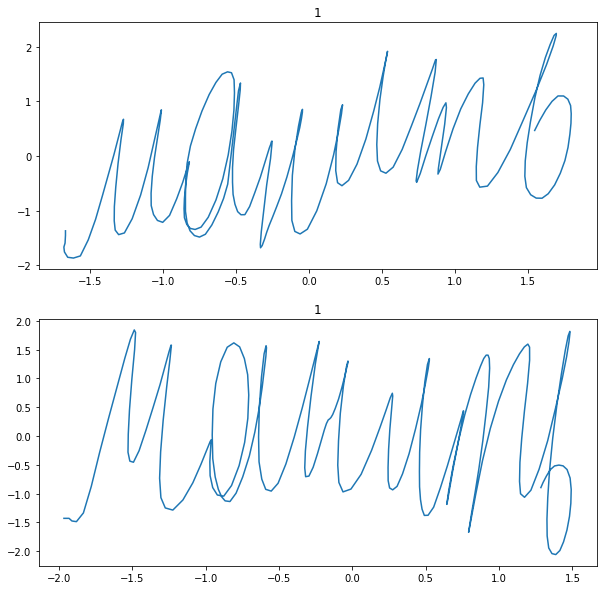

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X[0][0], X[0][1])
plt.title(y[0])
plt.subplot(2,1,2)
plt.plot(X[35][0], X[35][1])
plt.title(y[35])
plt.show()

In [8]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix[-1,-1]

In [9]:
def find_positives(anchor, positives):
    anchor = np.array([np.array(x).flatten() for x in anchor]).flatten()
    max = 0
    max_sign = 0
    for sign in positives:
        sign_flatten = np.array([np.array(x).flatten() for x in sign]).flatten()
        dist = dtw(anchor, sign_flatten, window = 1)
        if dist>max:
            max=dist
            max_sign=sign
    return max_sign

In [10]:
def find_negatives(anchor, negatives):
    anchor = np.array([np.array(x).flatten() for x in anchor]).flatten()
    min = 50000
    min_sign = 0
    for sign in negatives:
        sign_flatten = np.array([np.array(x).flatten() for x in sign]).flatten()
        dist = dtw(np.array(anchor).flatten(), np.array(sign_flatten).flatten(), window = 1)
        if dist<min:
            min=dist
            min_sign=sign
    return min_sign

In [18]:
# anchor_dataset = []
# positive_dataset = []
# negative_dataset = []
# random.random()
# for i in range(len(X)):
#     for j in range(0,10):
#         anchor_dataset.append(X[i])
#         index = y[i]
#         indexes_positive = [x for x,d in enumerate(y) if d==index]
#         indexes_positive.remove(i)
#         # positive = find_positives(X[i], [X[j] for j in indexes])
#         # negative = find_negatives(X[i], [X[j] for j in [x for x,d in enumerate(y) if d!=index]])
#         indexes_negative = [x for x,d in enumerate(y) if d!=index]
#         positive_dataset.append(X[random.choice(indexes_positive)])
#         negative_dataset.append(X[random.choice(indexes_negative)])
# with open('anchor_words_rand.npy', 'wb') as f:
#     np.save(f, np.array(anchor_dataset, dtype=float))
# with open('positive_words_rand.npy', 'wb') as f:
#     np.save(f, np.array(positive_dataset, dtype=float))
# with open('negative_words_rand.npy', 'wb') as f:
#     np.save(f, np.array(negative_dataset, dtype=float))
with open('anchor_words_rand.npy', 'rb') as f:
    anchor_dataset = np.load(f, allow_pickle=True)
with open('positive_words_rand.npy', 'rb') as f:
    positive_dataset = np.load(f, allow_pickle=True)
with open('negative_words_rand.npy', 'rb') as f:
    negative_dataset = np.load(f, allow_pickle=True)
        

In [50]:
def get_transpose(dataset):
    new = []
    for i in dataset:
        t_i = i.transpose()
        new.append(t_i)
    return new
new_anchor = get_transpose(anchor_dataset)
new_positive = get_transpose(positive_dataset)
new_negative = get_transpose(negative_dataset)

In [ ]:
dataset = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(new_anchor), 
tf.data.Dataset.from_tensor_slices(new_positive), 
tf.data.Dataset.from_tensor_slices(new_negative))

In [42]:
dataset = dataset.shuffle(buffer_size=1024)

In [43]:
train_dataset = dataset.take(round(len(anchor_dataset) * 0.8))
val_dataset = dataset.skip(round(len(anchor_dataset) * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

In [22]:
inp = tf.keras.Input(shape=(7, 256,))
flatten = tf.keras.layers.Flatten()(inp)
dense1 = tf.keras.layers.Dense(1024, activation="relu")(flatten)
dense1 = tf.keras.layers.BatchNormalization()(dense1)
dense2 = tf.keras.layers.Dense(512, activation="relu")(dense1)
dense2 = tf.keras.layers.BatchNormalization()(dense2)
output = tf.keras.layers.Dense(480)(dense2)
embedding_model = tf.keras.Model(inputs=inp, outputs=output, name="Embedding")

In [23]:
class DistanceLayer(tf.keras.layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)

In [24]:
anchor_input = tf.keras.layers.Input(name="anchor", shape=(7, 256))
positive_input = tf.keras.layers.Input(name="positive", shape=(7, 256))
negative_input = tf.keras.layers.Input(name="negative", shape=(7, 256))

distances = DistanceLayer()(
    embedding_model(anchor_input),
    embedding_model(positive_input),
    embedding_model(negative_input),
)

siamese_network = tf.keras.Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [25]:
class SiameseModel(tf.keras.Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [26]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001))

In [27]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
        #  tf.keras.callbacks.ModelCheckpoint(filepath='best_model.tf', monitor='val_loss', save_best_only=True, save_format="tf")
         ]

In [21]:
siamese_model.fit(train_dataset, epochs=15, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/15
1084/1084 [==============================] - 26s 21ms/step - loss: 1.1044 - val_loss: 0.7440
Epoch 2/15
1084/1084 [==============================] - 23s 21ms/step - loss: 0.1698 - val_loss: 0.7251
Epoch 3/15
1084/1084 [==============================] - 23s 21ms/step - loss: 0.0889 - val_loss: 0.7783
Epoch 4/15
1084/1084 [==============================] - 22s 20ms/step - loss: 0.1137 - val_loss: 0.8354


In [22]:
cosine_similarity = tf.metrics.RootMeanSquaredError()
sample = next(iter(val_dataset))

anchor, positive, negative = sample
anchor_embedding, positive_embedding, negative_embedding = (
    embedding_model(anchor),
    embedding_model(positive),
    embedding_model(negative),
)
positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())

Positive similarity: 0.41598728
Negative similarity 0.48653597


In [23]:
embedding_model(anchor)

<tf.Tensor: shape=(32, 480), dtype=float32, numpy=
array([[ 0.04638093,  0.42353106, -0.6132316 , ..., -0.03813583,
         1.1804665 ,  0.55486625],
       [ 0.15848435,  1.3297406 , -0.7178494 , ...,  0.72095174,
         1.1357003 ,  0.49722832],
       [ 1.3232902 ,  1.9933639 ,  0.63844955, ...,  0.83756375,
         0.26309672,  0.8576822 ],
       ...,
       [ 0.26754335,  2.428843  , -1.1350467 , ...,  0.8750158 ,
         2.4755366 ,  0.6549005 ],
       [ 0.43773955,  1.6198242 , -1.8414237 , ...,  0.5668878 ,
         1.4540825 ,  0.99843186],
       [ 0.9788329 ,  1.4746144 , -0.55624115, ...,  1.3784643 ,
         0.9866392 ,  1.0034002 ]], dtype=float32)>

In [23]:
all=[]
num = -1
f_len = 256
for i in range(len(X)):
    if num != y[i]:
        if num != -1:
            all = all+own
            # save_features("p1p2\own_{}.bip".format(y[i]), len(own), f_len, own)
        num = y[i]
        own = []
    own.append(embedding_model(tf.constant(X[i, None])).numpy()[0])
    


In [41]:
import struct
def save_features(file, n_examples, n_features, matrix):
    f = open(file, 'wb')
    f.write(struct.pack('2I', n_examples, n_features))
    for row in matrix:
        for item in row:
            # for i in item:
                f.write(struct.pack('f', item))
    f.close()

In [25]:
random.shuffle(all)
all = np.array(all)
i = int(len(all)*0.3)
all_test = all[:i]
all_train = all[i:]
save_features("p1p2\\all_words_test.bip", len(all_test), f_len, all_test)
save_features("p1p2\\all_words_train.bip", len(all_train), f_len, all_train)

In [26]:
own=[]
num = -1
f_len = 256
for i in range(100):
    if num != y[i]:
        if num != -1:
            random.shuffle(own)
            own = np.array(own)
            j = int(len(own)*0.3)
            own_test = own[:j]
            own_train = own[j:]
            save_features("p1p2\own_words_{}.bip".format(y[i]), len(own_train), f_len, own_train)
            save_features("p1p2\own_words_{}_t.bip".format(y[i]), len(own_test), f_len, own_test)
        num = y[i]
        own = []
    own.append(embedding_model(tf.constant(X[i, None])).numpy()[0])

In [44]:
inp = tf.keras.Input(shape=(256, 7,))
conv1 = tf.keras.layers.Conv1D(256, 3, strides=2)(inp)
batch1 = tf.keras.layers.BatchNormalization()(conv1)
activation1 = tf.keras.layers.Activation('relu')(batch1)
pool1 = tf.keras.layers.MaxPool1D(strides=2, padding='same')(activation1)
conv2 = tf.keras.layers.Conv1D(256, 1, strides=2)(pool1)
batch2 = tf.keras.layers.BatchNormalization()(conv2)
activation2 = tf.keras.layers.Activation('relu')(batch2)
conv3 = tf.keras.layers.Conv1D(256, 1)(activation2)
batch3 = tf.keras.layers.BatchNormalization()(conv3)
output = tf.keras.layers.Activation('relu')(batch3)
# output = tf.nn.l2_normalize(activation3, axis=None, epsilon=1e-12) 
embedding_model2 = tf.keras.Model(inputs=inp, outputs=output, name="Embedding")

In [45]:
anchor_input = tf.keras.layers.Input(name="anchor", shape=(256, 7))
positive_input = tf.keras.layers.Input(name="positive", shape=(256, 7))
negative_input = tf.keras.layers.Input(name="negative", shape=(256, 7))

distances = DistanceLayer()(
    embedding_model2(anchor_input),
    embedding_model2(positive_input),
    embedding_model2(negative_input),
)

siamese_network2 = tf.keras.Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [46]:
siamese_model2 = SiameseModel(siamese_network2)
siamese_model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001))

In [47]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        #  tf.keras.callbacks.ModelCheckpoint(filepath='best_model.tf', monitor='val_loss', save_best_only=True, save_format="tf")
         ]

In [48]:
siamese_model2.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/50


ValueError: in user code:

    File "D:\anaconda3\envs\sign_venv\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "D:\anaconda3\envs\sign_venv\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda3\envs\sign_venv\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sophi\AppData\Local\Temp/ipykernel_20264/3351330080.py", line 26, in train_step
        loss = self._compute_loss(data)
    File "C:\Users\sophi\AppData\Local\Temp/ipykernel_20264/3351330080.py", line 52, in _compute_loss
        ap_distance, an_distance = self.siamese_network(data)
    File "D:\anaconda3\envs\sign_venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\anaconda3\envs\sign_venv\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 256, 7), found shape=(None, 7, 43337)


In [33]:
cosine_similarity = tf.metrics.RootMeanSquaredError()
sample = next(iter(val_dataset))

anchor, positive, negative = sample
anchor_embedding, positive_embedding, negative_embedding = (
    embedding_model2(anchor),
    embedding_model2(positive),
    embedding_model2(negative),
)
positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())

Positive similarity: 0.19663027
Negative similarity 0.25786808


In [116]:
embedding_model2(anchor)

<tf.Tensor: shape=(32, 1, 256), dtype=float32, numpy=
array([[[0.30543354, 0.        , 0.        , ..., 1.5233778 ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 1.9095824 ,
         0.        , 0.        ]],

       [[0.17618644, 0.39662904, 0.        , ..., 0.92162395,
         0.        , 0.        ]],

       ...,

       [[0.37519094, 0.2477288 , 0.        , ..., 1.5290482 ,
         0.        , 0.        ]],

       [[0.675966  , 0.00931163, 0.        , ..., 1.3897022 ,
         0.        , 0.        ]],

       [[0.7300038 , 0.        , 0.        , ..., 1.2403111 ,
         0.02159845, 0.        ]]], dtype=float32)>

In [34]:
own=[]
all = []
num = -1
f_len = 256
for i in range(100):
    if num != y[i]:
        if num != -1:
            random.shuffle(own)
            own = np.array(own)
            j = int(len(own)*0.3)
            own_test = own[:j]
            own_train = own[j:]
            save_features("p1p2\own2_words_{}.bip".format(y[i]), len(own_train), f_len, own_train)
            save_features("p1p2\own2_words_{}_t.bip".format(y[i]), len(own_test), f_len, own_test)
        num = y[i]
        own = []
    own.append(embedding_model2(tf.constant(X[i, None])).numpy()[0])


In [35]:
all=[]
num = -1
f_len = 256
for i in range(len(X)):
    if num != y[i]:
        if num != -1:
            all = all+own
            # save_features("p1p2\own_{}.bip".format(y[i]), len(own), f_len, own)
        num = y[i]
        own = []
    own.append(embedding_model2(tf.constant(X[i, None])).numpy()[0])
random.shuffle(all)
all = np.array(all)
i = int(len(all)*0.3)
all_test = all[:i]
all_train = all[i:]
save_features("p1p2\\all2_words_test.bip", len(all_test), f_len, all_test)
save_features("p1p2\\all2_words_train.bip", len(all_train), f_len, all_train)

In [36]:
inp = tf.keras.Input(shape=(7, 256,))
gru = tf.keras.layers.GRU(256, return_sequences=True)(inp)
output = tf.keras.layers.SimpleRNN(256)(gru)
# output = tf.nn.l2_normalize(activation3, axis=None, epsilon=1e-12) 
embedding_model3 = tf.keras.Model(inputs=inp, outputs=output, name="Embedding")

In [37]:
anchor_input = tf.keras.layers.Input(name="anchor", shape=(7, 256))
positive_input = tf.keras.layers.Input(name="positive", shape=(7, 256))
negative_input = tf.keras.layers.Input(name="negative", shape=(7, 256))

distances = DistanceLayer()(
    embedding_model3(anchor_input),
    embedding_model3(positive_input),
    embedding_model3(negative_input),
)

siamese_network3 = tf.keras.Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [38]:
siamese_model3 = SiameseModel(siamese_network3)
siamese_model3.compile(optimizer=tf.keras.optimizers.Adam(0.0001))

In [39]:
siamese_model3.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/50
1084/1084 [==============================] - 24s 18ms/step - loss: 0.9630 - val_loss: 0.6318
Epoch 2/50
1084/1084 [==============================] - 19s 17ms/step - loss: 0.1445 - val_loss: 0.5621
Epoch 3/50
1084/1084 [==============================] - 19s 17ms/step - loss: 0.0295 - val_loss: 0.5392
Epoch 4/50
1084/1084 [==============================] - 19s 17ms/step - loss: 0.0194 - val_loss: 0.5113
Epoch 5/50
1084/1084 [==============================] - 19s 17ms/step - loss: 0.0222 - val_loss: 0.5060
Epoch 6/50
1084/1084 [==============================] - 20s 18ms/step - loss: 0.0284 - val_loss: 0.4938
Epoch 7/50
1084/1084 [==============================] - 20s 19ms/step - loss: 0.0217 - val_loss: 0.4851
Epoch 8/50
1084/1084 [==============================] - 20s 19ms/step - loss: 0.0202 - val_loss: 0.4573
Epoch 9/50
1084/1084 [==============================] - 20s 18ms/step - loss: 0.0180 - val_loss: 0.4715
Epoch 10/50
1084/1084 [==============================] - 20s 18m

In [35]:
embedding_model3(anchor)

NameError: name 'anchor' is not defined

In [42]:
own=[]
all = []
num = -1
f_len = 256
for i in range(100):
    if num != y[i]:
        if num != -1:
            random.shuffle(own)
            own = np.array(own)
            j = int(len(own)*0.3)
            own_test = own[:j]
            own_train = own[j:]
            save_features("p1p2\own3_words_{}.bip".format(y[i]), len(own_train), f_len, own_train)
            save_features("p1p2\own3_words_{}_t.bip".format(y[i]), len(own_test), f_len, own_test)
        num = y[i]
        own = []
    own.append(embedding_model3(tf.constant(X[i, None])).numpy()[0])

In [43]:
all=[]
num = -1
f_len = 256
for i in range(len(X)):
    if num != y[i]:
        if num != -1:
            all = all+own
            # save_features("p1p2\own_{}.bip".format(y[i]), len(own), f_len, own)
        num = y[i]
        own = []
    own.append(embedding_model3(tf.constant(X[i, None])).numpy()[0])
random.shuffle(all)
all = np.array(all)
i = int(len(all)*0.3)
all_test = all[:i]
all_train = all[i:]
save_features("p1p2\\all3_words_test.bip", len(all_test), f_len, all_test)
save_features("p1p2\\all3_words_train.bip", len(all_train), f_len, all_train)